In [2]:

import os
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn
import numpy as np
import pandas as pd
import pylab
import sklearn.preprocessing

import scgenome
import scgenome.db.qc
import scgenome.cnplot
import scgenome.cnfilter
import scgenome.cnclones

LOGGING_FORMAT = "%(asctime)s - %(levelname)s - %(message)s"
logging.basicConfig(format=LOGGING_FORMAT, stream=sys.stderr, level=logging.INFO)

sample_ids = [
    'SA1090',
    'SA921',
    'SA922',
]



Download zenodo data using wget:


In [69]:

# !mkdir zenodo_data/
# !wget https://zenodo.org/record/5725635/files/ov2295_cell_cn.csv.gz?download=1 -O zenodo_data/ov2295_cell_cn.csv.gz
# !wget https://zenodo.org/record/5725635/files/ov2295_cell_metrics.csv.gz?download=1 -O zenodo_data/ov2295_cell_metrics.csv.gz


--2021-11-24 15:46:04--  https://zenodo.org/record/5725635/files/ov2295_cell_cn.csv.gz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269571110 (257M) [application/octet-stream]
Saving to: ‘zenodo_data/ov2295_cell_cn.csv.gz’

zenodo_data/ov2295_ 100%[===================>] 257.08M  21.3MB/s    in 13s     

2021-11-24 15:46:17 (20.4 MB/s) - ‘zenodo_data/ov2295_cell_cn.csv.gz’ saved [269571110/269571110]

--2021-11-24 15:46:18--  https://zenodo.org/record/5725635/files/ov2295_cell_metrics.csv.gz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491897 (480K) [application/octet-stream]
Saving to: ‘zenodo_data/ov2295_cell_metrics.csv.gz’

zenodo_data/ov2295_ 100%[===================>] 480.37K  1.04MB/s    in 0.5s    


# Load CN data


In [70]:

cn_data = pd.read_csv(
    'zenodo_data/ov2295_cell_cn.csv.gz',
    dtype={
        'cell_id': 'category',
        'sample_id': 'category',
        'library_id': 'category',
        'chr': 'category',
    })

metrics_data = pd.read_csv(
    'zenodo_data/ov2295_cell_metrics.csv.gz',
    dtype={
        'cell_id': 'category',
        'sample_id': 'category',
        'library_id': 'category',
    })

scgenome.utils.union_categories([cn_data, metrics_data])


In [93]:

cn_data['cell_id']


0            SA922-A90554B-R34-C70
1            SA922-A90554B-R34-C70
2            SA922-A90554B-R34-C70
3            SA922-A90554B-R34-C70
4            SA922-A90554B-R34-C70
                     ...          
12200991    SA1090-A96213A-R29-C58
12200992    SA1090-A96213A-R29-C58
12200993    SA1090-A96213A-R29-C58
12200994    SA1090-A96213A-R29-C58
12200995    SA1090-A96213A-R29-C58
Name: cell_id, Length: 12200996, dtype: category
Categories (1966, object): ['SA922-A90554B-R27-C29', 'SA922-A90554B-R32-C37', 'SA921-A90554A-R05-C52', 'SA922-A90554B-R30-C42', ..., 'SA1090-A96213A-R31-C48', 'SA1090-A96213A-R27-C38', 'SA1090-A96213A-R30-C54', 'SA921-A90554A-R04-C05']

In [94]:

metrics_data['cell_id']


0        SA922-A90554B-R34-C70
1        SA922-A90554B-R28-C09
2        SA922-A90554B-R28-C03
3        SA922-A90554B-R28-C07
4        SA922-A90554B-R28-C05
                 ...          
1961    SA1090-A96213A-R30-C31
1962    SA1090-A96213A-R30-C34
1963    SA1090-A96213A-R30-C37
1964    SA1090-A96213A-R29-C59
1965    SA1090-A96213A-R29-C58
Name: cell_id, Length: 1966, dtype: category
Categories (1966, object): ['SA922-A90554B-R27-C29', 'SA922-A90554B-R32-C37', 'SA921-A90554A-R05-C52', 'SA922-A90554B-R30-C42', ..., 'SA1090-A96213A-R31-C48', 'SA1090-A96213A-R27-C38', 'SA1090-A96213A-R30-C54', 'SA921-A90554A-R04-C05']

In [97]:

cn.index.categories == 


Index(['SA922-A90554B-R27-C29', 'SA922-A90554B-R32-C37',
       'SA921-A90554A-R05-C52', 'SA922-A90554B-R30-C42',
       'SA1090-A96213A-R33-C48', 'SA1090-A96213A-R31-C59',
       'SA1090-A96213A-R34-C17', 'SA1090-A96213A-R29-C41',
       'SA1090-A96213A-R31-C49', 'SA1090-A96213A-R26-C11',
       ...
       'SA922-A90554B-R35-C09', 'SA1090-A96213A-R30-C45',
       'SA921-A90554A-R13-C12', 'SA1090-A96213A-R25-C21',
       'SA921-A90554A-R11-C58', 'SA1090-A96213A-R30-C14',
       'SA1090-A96213A-R31-C48', 'SA1090-A96213A-R27-C38',
       'SA1090-A96213A-R30-C54', 'SA921-A90554A-R04-C05'],
      dtype='object', length=1966)

In [71]:

metrics_data.query('quality > 0.75')


,cell_id,unpaired_mapped_reads,paired_mapped_reads,unpaired_duplicate_reads,paired_duplicate_reads,unmapped_reads,percent_duplicate_reads,estimated_library_size,total_reads,total_mapped_reads,...,mean_state_mads,mean_state_vars,mad_neutral_state,breakpoints,mean_copy,state_mode,log_likelihood,true_multiplier,quality,order
1,SA922-A90554B-R28-C09,49767,2723310,19848,701345,588432,0.260503,4353052.0,6084820,5496388,...,0.070188,0.361665,0.041321,93,4.132577,5,-4189.124414,4.940759,0.880,572.0
3,SA922-A90554B-R28-C07,113421,5554326,44742,1636879,905778,0.297332,7488663.0,12127852,11222074,...,0.133991,0.224699,0.083038,93,4.111607,5,-2830.590149,2.013123,0.984,536.0
8,SA922-A90554B-R33-C19,114751,5894998,46881,1740093,980001,0.297960,7932518.0,12884748,11904747,...,0.068068,0.222400,0.046186,96,4.017105,4,-3267.338363,4.022045,0.986,295.0
9,SA922-A90554B-R34-C09,152768,8184407,69453,2752833,1342485,0.339339,9279002.0,17864068,16521583,...,0.097552,0.212898,0.064575,89,4.017306,4,-2177.809116,1.990554,0.984,280.0
10,SA922-A90554B-R34-C08,139676,7306101,63307,2462040,1255176,0.339711,8258587.0,16007054,14751878,...,0.069193,0.209258,0.042807,93,3.688258,4,-3175.580827,4.069593,0.888,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,SA1090-A96213A-R30-C32,70620,2894454,24504,703272,342525,0.251912,5057169.0,6202054,5859529,...,0.041262,0.047023,0.054142,80,1.832711,2,1106.890676,2.057152,0.998,174.0
1961,SA1090-A96213A-R30-C31,46184,2406268,17866,607619,470952,0.261170,4002501.0,5329672,4858720,...,0.046498,0.032229,0.048711,79,1.826312,2,1766.237371,2.003185,0.994,255.0
1962,SA1090-A96213A-R30-C34,34713,1767297,11062,347979,299015,0.205170,3984984.0,3868322,3569307,...,0.035285,0.023299,0.049922,76,1.824628,2,1801.129676,2.021355,0.986,194.0
1964,SA1090-A96213A-R29-C59,58910,3221003,21563,787529,422878,0.254203,5598490.0,6923794,6500916,...,0.048191,0.040998,0.052612,87,1.884968,2,1083.609942,2.058933,0.998,312.0


In [72]:

cn_data.head()


,cell_id,sample_id,library_id,chr,start,end,reads,copy,state,gc,map
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6,-1.000000,0.348523
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6,-1.000000,0.770391
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6,0.598332,0.982072
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6,0.539498,0.963004
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6,0.594508,0.997066


<AxesSubplot:xlabel='gc', ylabel='reads'>

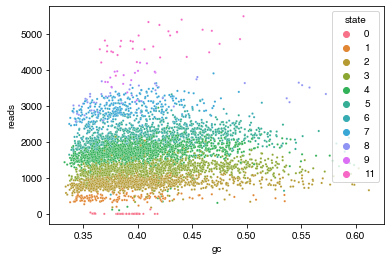

In [79]:

import seaborn as sns

plot_data = cn_data.query('cell_id == "SA922-A90554B-R34-C08"').query('gc > 0')
plot_data['state'] = plot_data['state'].astype('category')

sns.scatterplot(data=plot_data, x='gc', y='reads', hue='state', s=5)



Create a matrix of `copy` values with rows as regions, cells as columns


In [116]:

cn_reads = (
    cn_data
        .set_index(['chr', 'start', 'end', 'cell_id'])['reads']
        .unstack(level='cell_id').fillna(0).transpose()
)

cn_copy = (
    cn_data
        .set_index(['chr', 'start', 'end', 'cell_id'])['copy']
        .unstack(level='cell_id').fillna(0).transpose()
)

cn_state = (
    cn_data
        .set_index(['chr', 'start', 'end', 'cell_id'])['state']
        .unstack(level='cell_id').fillna(0).transpose()
)

cn_reads



chr                           Y                                               \
start                  1        500001   1000001  1500001  2000001  2500001    
end                    500000   1000000  1500000  2000000  2500000  3000000    
cell_id                                                                        
SA922-A90554B-R27-C29         0        0        0        0        0        6   
SA922-A90554B-R32-C37         0        0        0        0        0        4   
SA921-A90554A-R05-C52         0        0        0        0        0        4   
SA922-A90554B-R30-C42         0        0        0        0        0        8   
SA1090-A96213A-R33-C48        0        0        0        0        0        4   
...                         ...      ...      ...      ...      ...      ...   
SA1090-A96213A-R30-C14        0        0        0        0        0        4   
SA1090-A96213A-R31-C48        0        0        0        0        0        0   
SA1090-A96213A-R27-C38        0        0        0        0        0        0   
SA1090-A96213A-R30-C54        0        0        0        0        0        2   
SA921-A90554A-R04-C05         0        0        0        0        0        5   

chr                                                         ...       16  \
start                  3000001  3500001  4000001  4500001   ... 85500001   
end                    3500000  4000000  4500000  5000000   ... 86000000   
cell_id                                                     ...            
SA922-A90554B-R27-C29        23       27        2        9  ...      705   
SA922-A90554B-R32-C37         6       11        2        1  ...      442   
SA921-A90554A-R05-C52         6       33        5        4  ...      535   
SA922-A90554B-R30-C42        12       12        0        4  ...      396   
SA1090-A96213A-R33-C48        7       10        0        1  ...      495   
...                         ...      ...      ...      ...  ...      ...   
SA1090-A96213A-R30-C14        8       17        0        2  ...      670   
SA1090-A96213A-R31-C48       18        4        1        0  ...      396   
SA1090-A96213A-R27-C38        2        0        1        4  ...       71   
SA1090-A96213A-R30-C54       10       10        2        1  ...      486   
SA921-A90554A-R04-C05        15       21        8        3  ...      822   

chr                                                                           \
start                  86000001 86500001 87000001 87500001 88000001 88500001   
end                    86500000 87000000 87500000 88000000 88500000 89000000   
cell_id                                                                        
SA922-A90554B-R27-C29       750      733      815      798      714      704   
SA922-A90554B-R32-C37       467      449      491      425      433      366   
SA921-A90554A-R05-C52       562      580      546      615      429      452   
SA922-A90554B-R30-C42       442      415      495      534      406      396   
SA1090-A96213A-R33-C48      475      534      607      464      454      423   
...                         ...      ...      ...      ...      ...      ...   
SA1090-A96213A-R30-C14      595      507      617      633      456      551   
SA1090-A96213A-R31-C48      288      378      353      381      311      474   
SA1090-A96213A-R27-C38       61       26       57       36       44       39   
SA1090-A96213A-R30-C54      450      385      403      466      376      448   
SA921-A90554A-R04-C05       785      795      756      744      666      895   

chr                                                
start                  89000001 89500001 90000001  
end                    89500000 90000000 90500000  
cell_id                                            
SA922-A90554B-R27-C29       684      773      274  
SA922-A90554B-R32-C37       522      418      151  
SA921-A90554A-R05-C52       366      366      266  
SA922-A90554B-R30-C42       497      471      198  
SA1090-A96213A-R33-C48      483      355 

In [120]:

import anndata as ad

bin_data = cn_data[['chr', 'start', 'end', 'gc', 'map']].drop_duplicates().set_index(['chr', 'start', 'end'], drop=False).sort_index()
cell_data = metrics_data.set_index(['cell_id'], drop=False).sort_index()

cn_ad = ad.AnnData(
    cn_reads.sort_index(),
    obs=cell_data,
    var=bin_data,
    layers={
        'copy': cn_copy,
        'state': cn_state,
    },
)


/Users/mcphera1/Projects/scgenome/notebooks/venvanndata/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [133]:

plot_data = pd.concat([
    cn_ad['SA1090-A96213A-R27-C38', :].to_df('copy').transpose(),
    cn_ad['SA1090-A96213A-R27-C38', :].to_df('state').transpose(),
], axis=1)
plot_data

# plt.figure(figsize=(10, 4))
# plot_cell_cn_profile(
#     ax, cn_data, value_field_name, cn_field_name=None, max_cn=13, chromosome=None, s=5, squashy=False, rawy=False)]


cell_id                SA1090-A96213A-R27-C38  SA1090-A96213A-R27-C38
chr start    end                                                     
Y   1        500000                  0.000000                       0
    500001   1000000                 0.000000                       0
    1000001  1500000                 0.000000                       0
    1500001  2000000                 0.000000                       0
    2000001  2500000                 0.000000                       0
...                                       ...                     ...
16  88000001 88500000                0.000000                       2
    88500001 89000000                3.745811                       2
    89000001 89500000                2.540769                       2
    89500001 90000000                1.084120                       2
    90000001 90500000                0.000000                       2

[6206 rows x 2 columns]

In [135]:

cn_ad['SA1090-A96213A-R27-C38', :].to_df()


chr                           Y                                               \
start                  1        500001   1000001  1500001  2000001  2500001    
end                    500000   1000000  1500000  2000000  2500000  3000000    
cell_id                                                                        
SA1090-A96213A-R27-C38      0.0      0.0      0.0      0.0      0.0      0.0   

chr                                                         ...       16  \
start                  3000001  3500001  4000001  4500001   ... 85500001   
end                    3500000  4000000  4500000  5000000   ... 86000000   
cell_id                                                     ...            
SA1090-A96213A-R27-C38      2.0      0.0      1.0      4.0  ...     71.0   

chr                                                                           \
start                  86000001 86500001 87000001 87500001 88000001 88500001   
end                    86500000 87000000 87500000 88000000 88500000 89000000   
cell_id                                                                        
SA1090-A96213A-R27-C38     61.0     26.0     57.0     36.0     44.0     39.0   

chr                                                
start                  89000001 89500001 90000001  
end                    89500000 90000000 90500000  
cell_id                                            
SA1090-A96213A-R27-C38     45.0     21.0      0.0  

[1 rows x 6206 columns]